In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# loading data
try:
    df = pd.read_csv('/kaggle/input/glass/glass.csv')
except FileNotFoundError:
    df = pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [36]:
# basic checks
print(f'shape of data is : {df.shape}')
print(f'\nnull valese are : \n{df.isnull().sum()}')
print(f'\ndupilcate : {df.duplicated().sum()}\n')
print(df.info())
print(df.columns)

shape of data is : (213, 10)

null valese are : 
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

dupilcate : 0

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB
None
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


### Attribute Information:

#### Id number: 1 to 214 (removed from CSV file)
#### RI: refractive index
#### Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
#### Mg: Magnesium
#### Al: Aluminum
#### Si: Silicon
#### K: Potassium
#### Ca: Calcium
#### Ba: Barium
#### Fe: Iron
#### Type of glass: (class attribute)
#### -- 1 building_windows_float_processed
#### -- 2 building_windows_non_float_processed
#### -- 3 vehicle_windows_float_processed
#### -- 4 vehicle_windows_non_float_processed (none in this database)
#### -- 5 containers
#### -- 6 tableware
#### -- 7 headlamps

### EDA

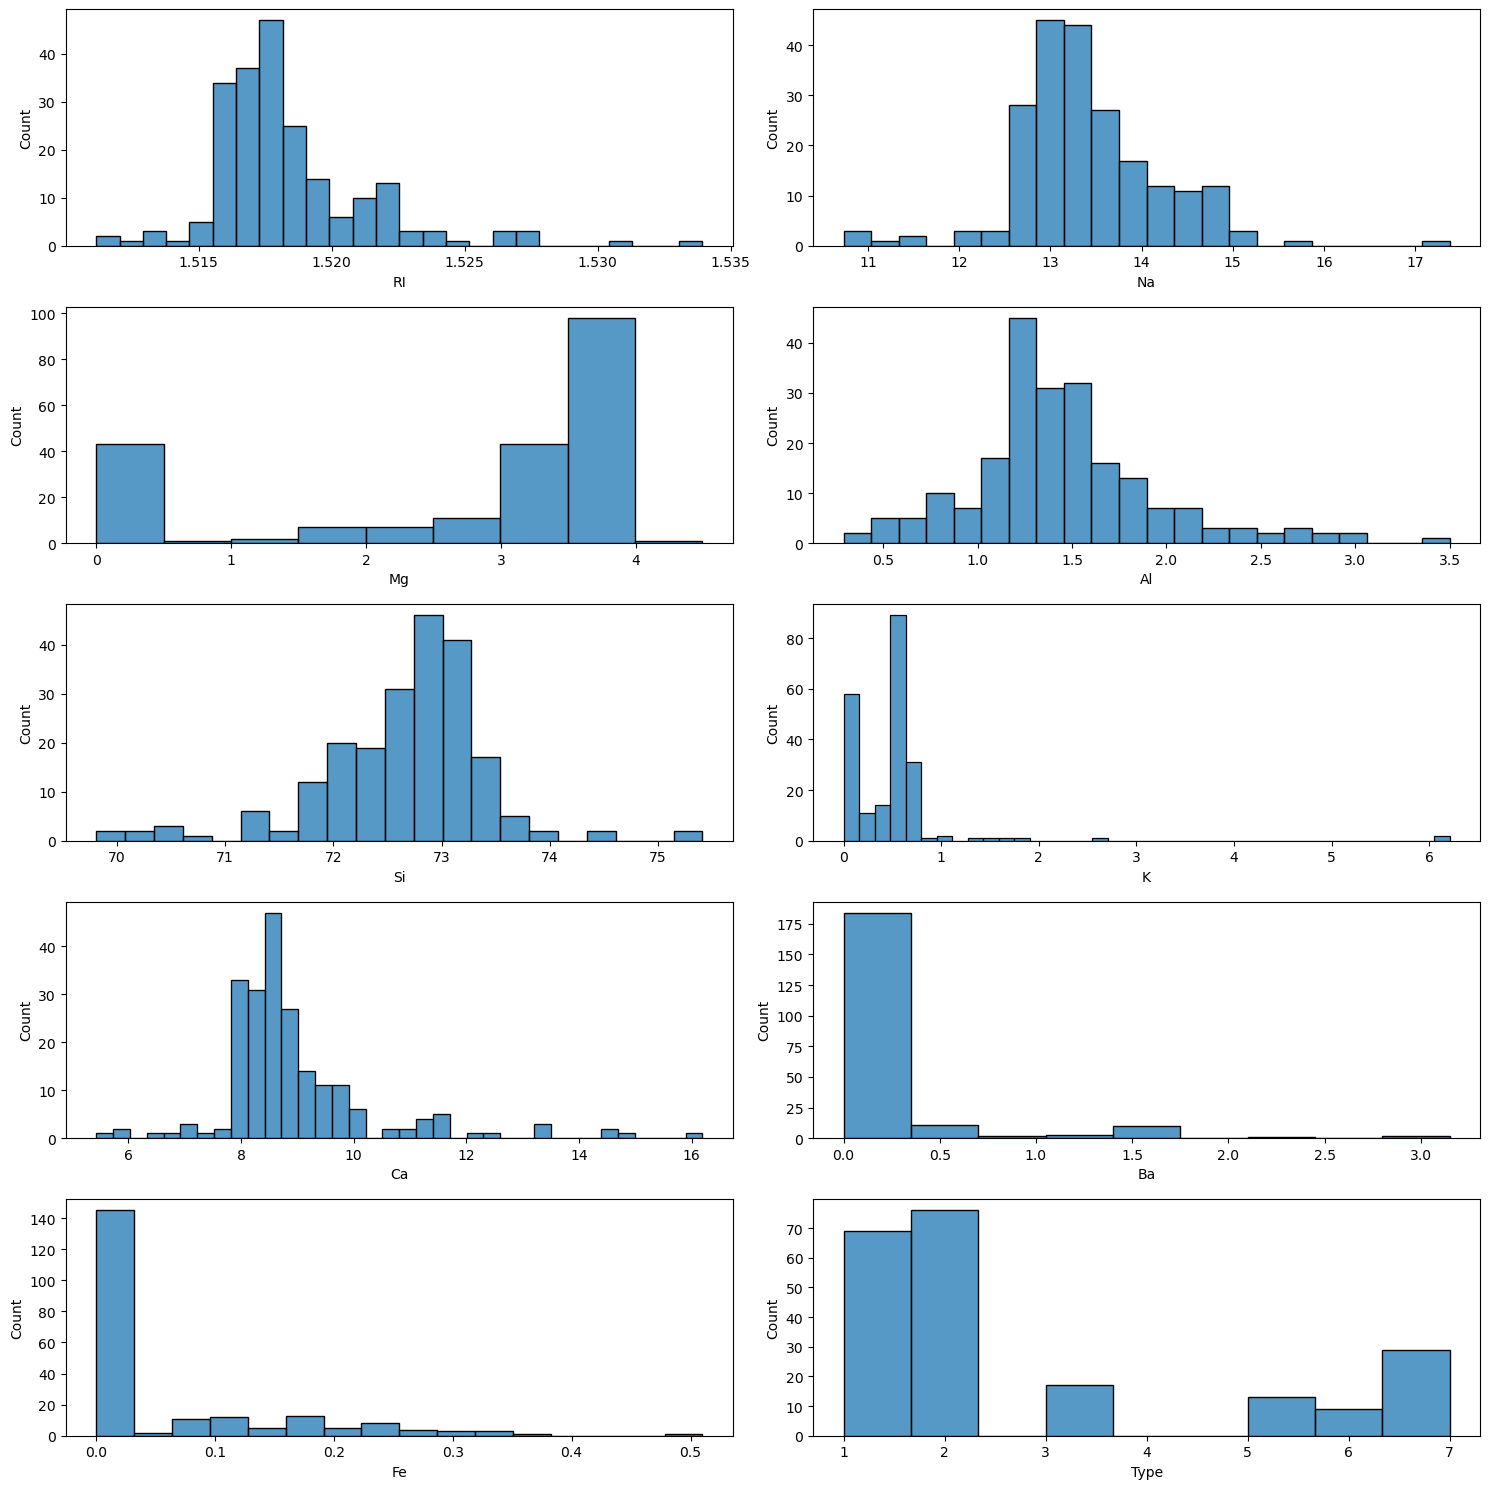

In [7]:
n = 1
plt.figure(figsize=(15,15))
for i in df.columns:
    if n<= len(df.columns):
        ax= plt.subplot(5, 2, n)
        sns.histplot(x=df[i])
    n += 1
plt.tight_layout()

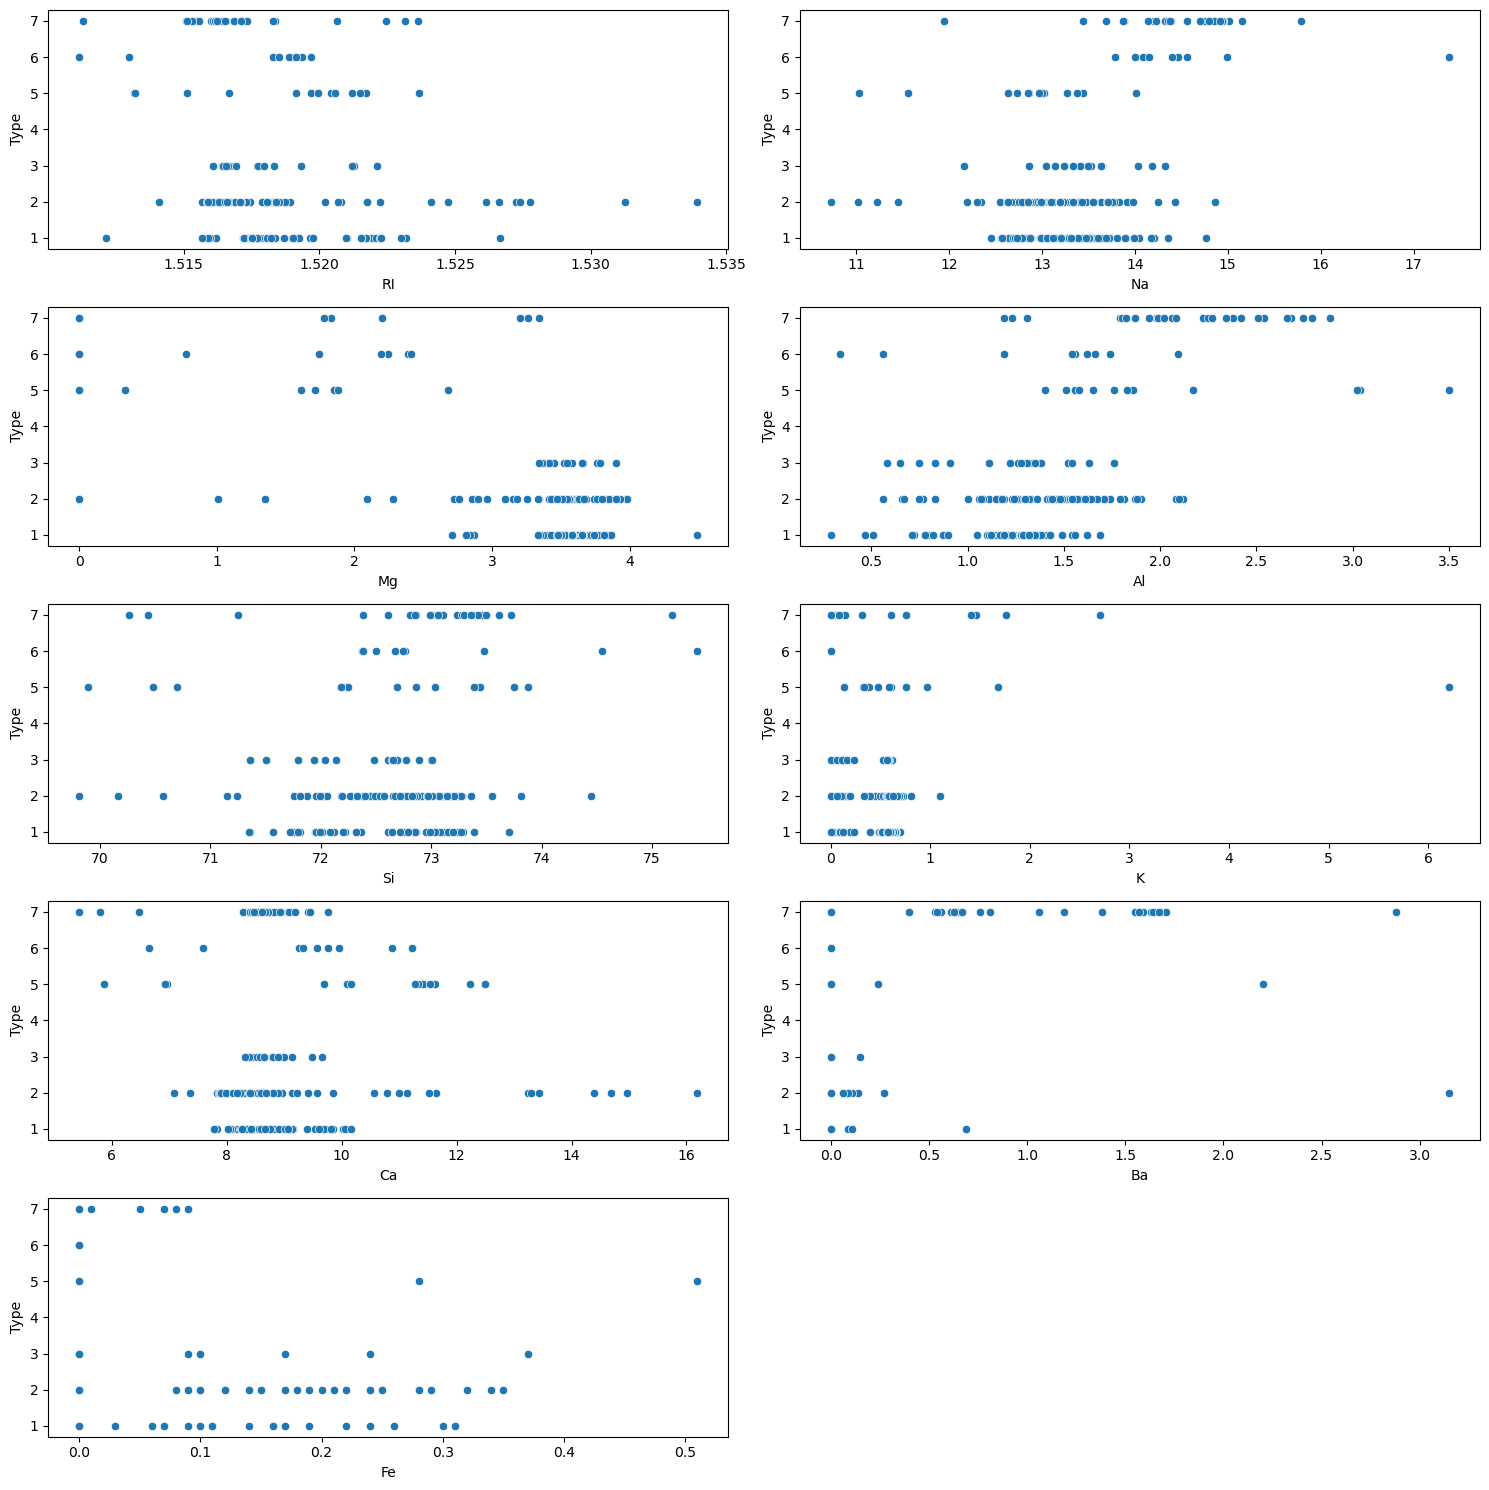

In [8]:
n = 1
plt.figure(figsize=(15,15))
for i in df.drop(columns='Type').columns:
    if n<= len(df.columns):
        ax= plt.subplot(5, 2, n)
        sns.scatterplot(x=df[i], y=df['Type'])
    n += 1
plt.tight_layout()

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,213.0,1.518348,0.003033,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.404085,0.816662,10.73000,12.90000,13.30000,13.81000,17.38000
Mg,213.0,2.679202,1.443691,0.00000,2.09000,3.48000,3.60000,4.49000
Al,213.0,1.449484,0.495925,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655070,0.773998,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.498873,0.653185,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.954085,1.425882,5.43000,8.24000,8.60000,9.15000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000
Type,213.0,2.788732,2.105130,1.00000,1.00000,2.00000,3.00000,7.00000


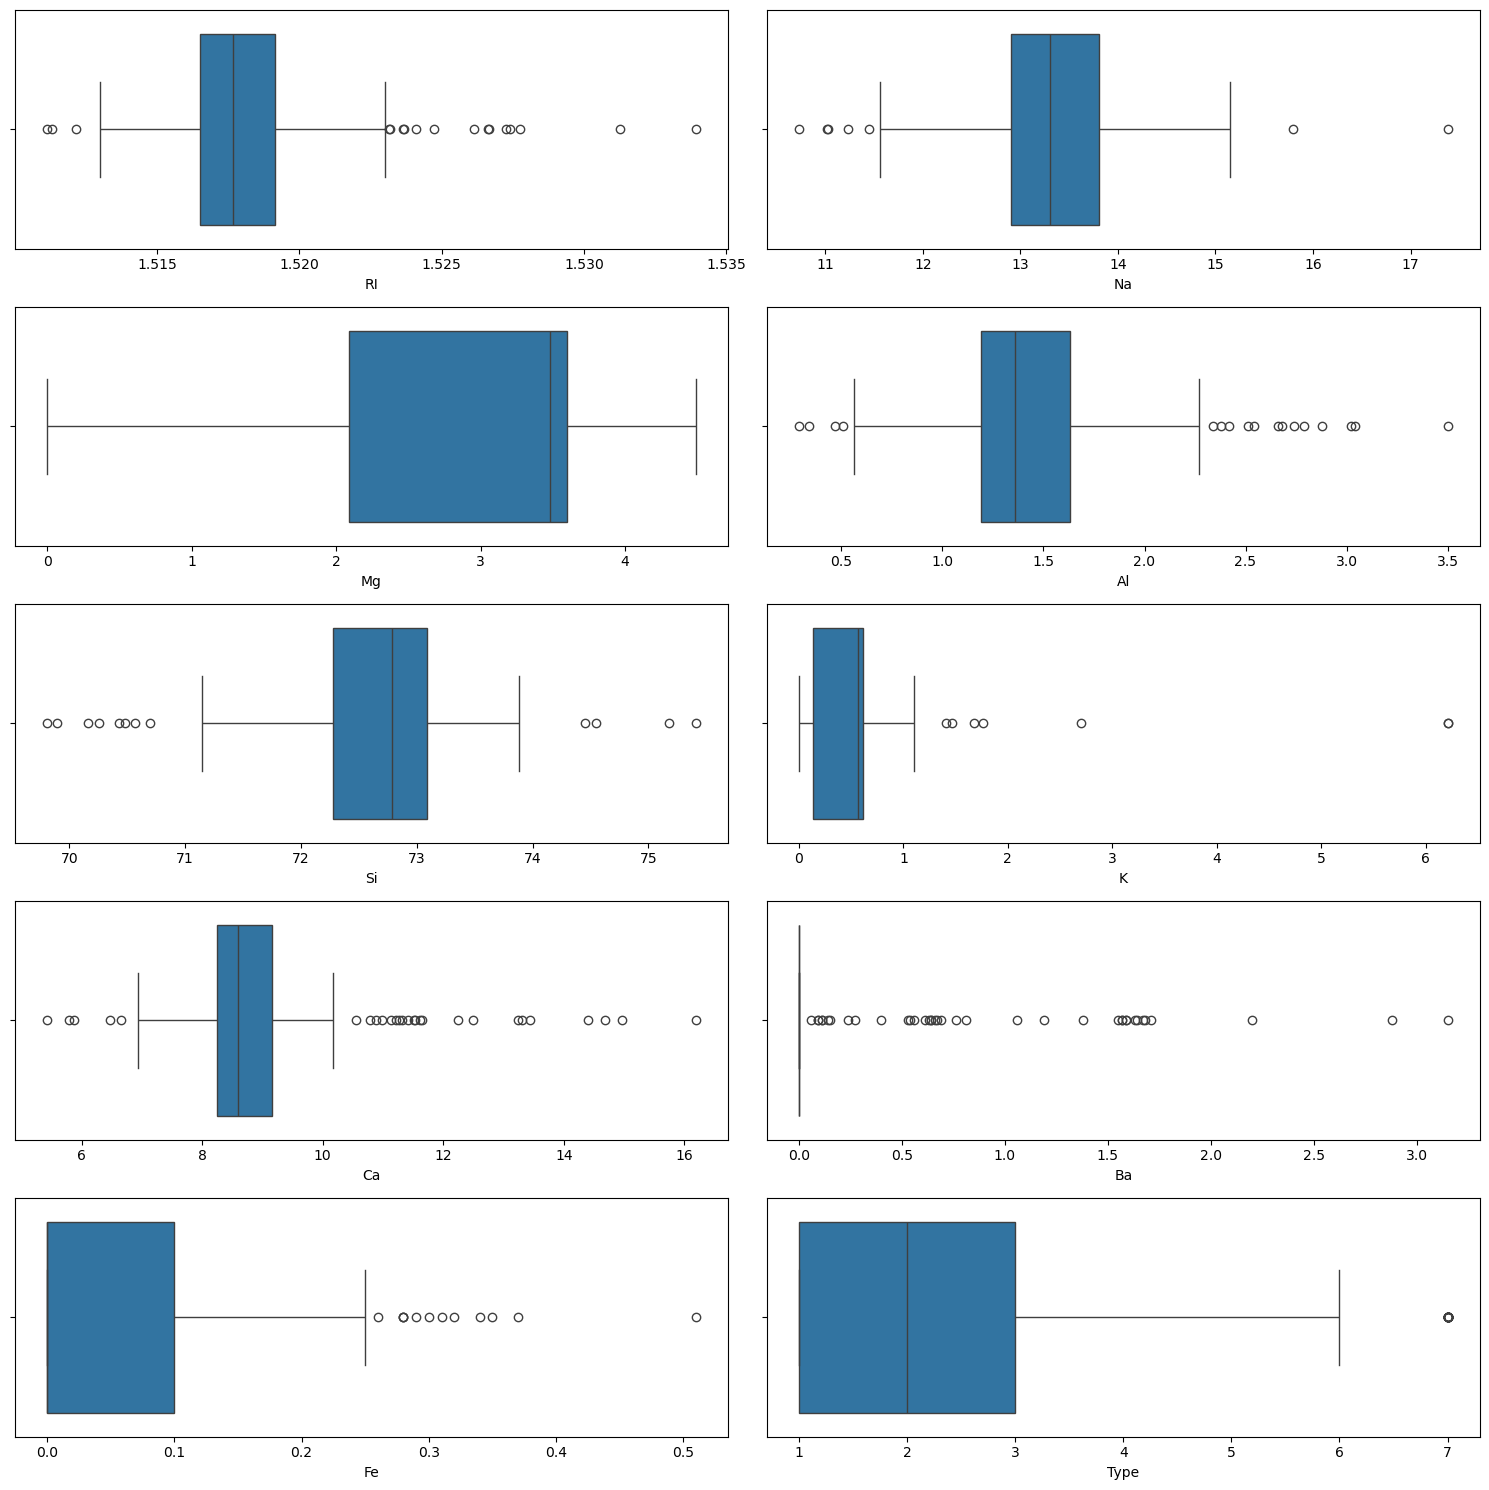

In [10]:
n = 1
plt.figure(figsize=(15,15))
for i in df.columns:
    if n<= len(df.columns):
        ax= plt.subplot(5, 2, n)
        sns.boxplot(x=df[i])
    n += 1
plt.tight_layout()

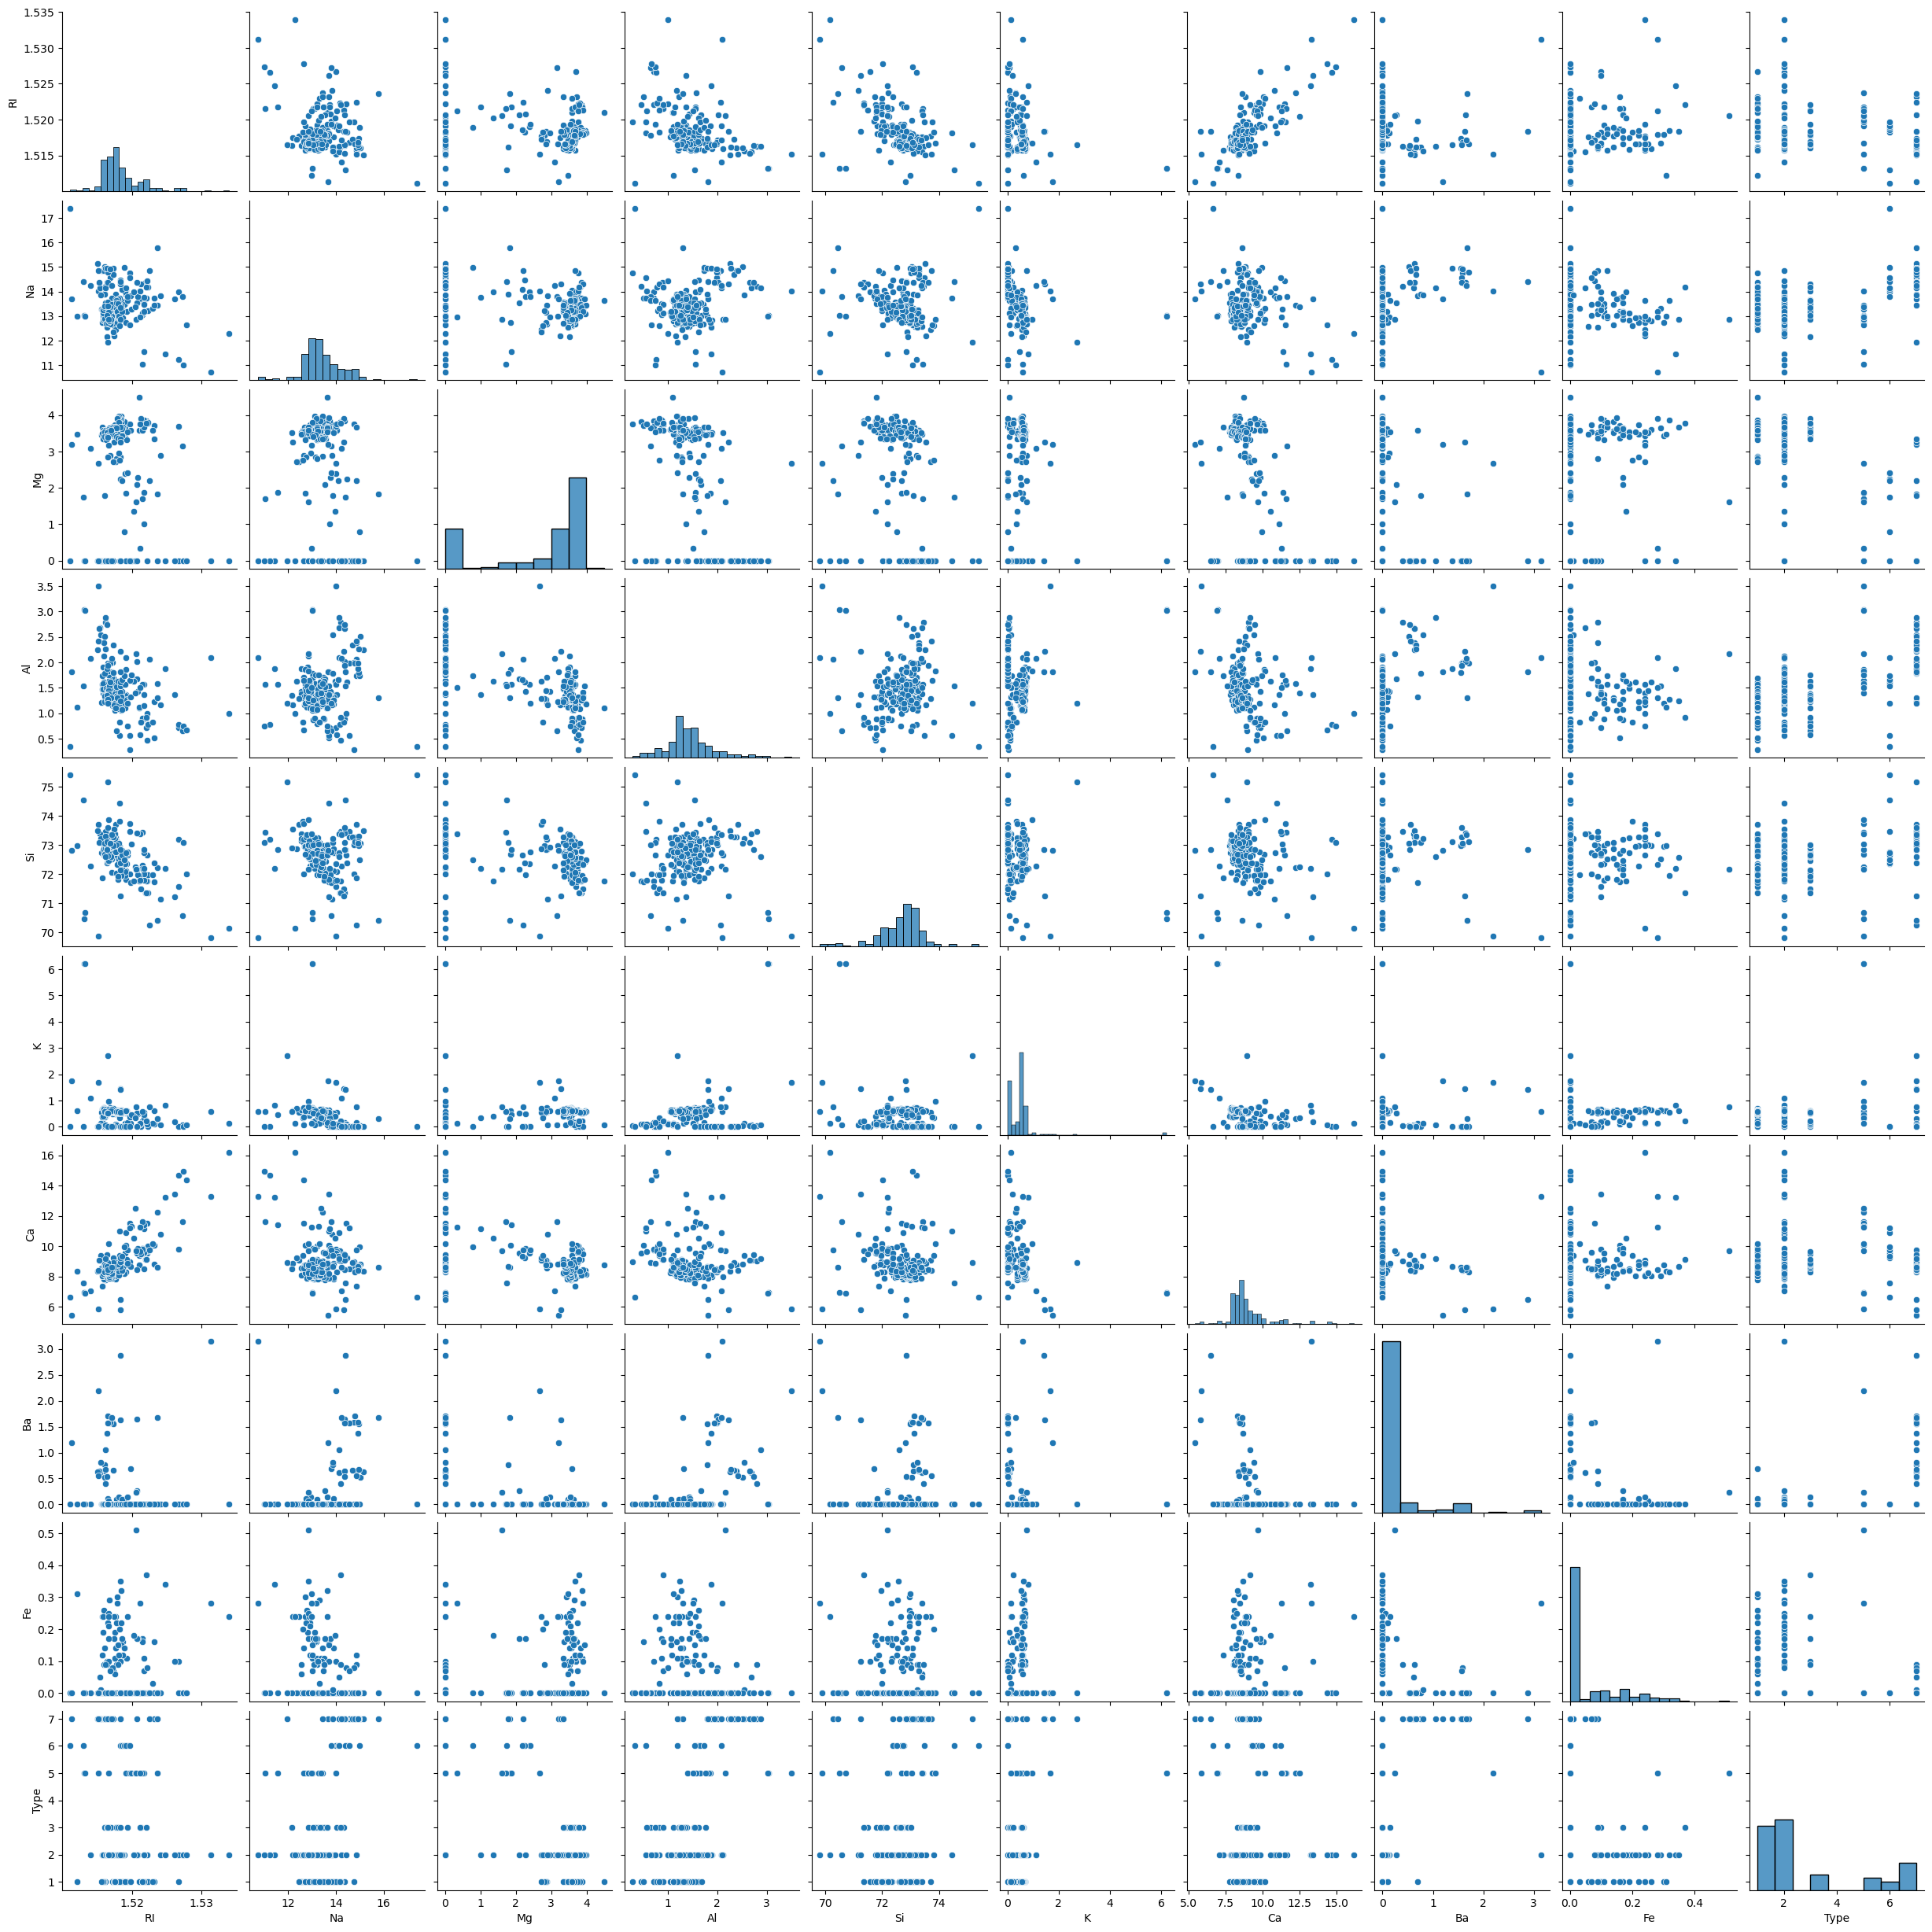

In [11]:
sns.pairplot(data=df)

In [12]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


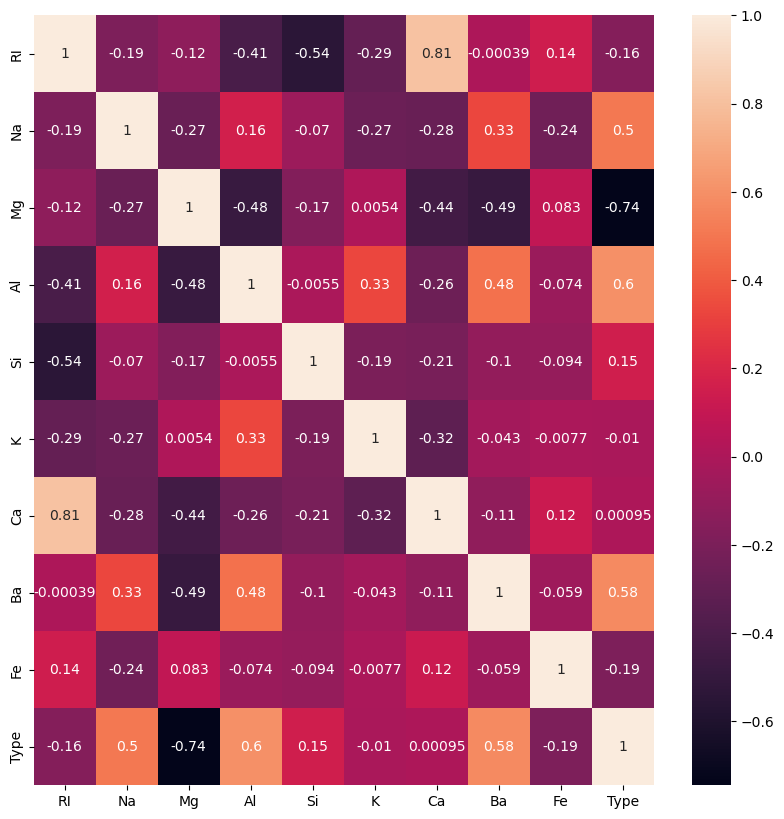

In [38]:
plt.figure(figsize=(10, 10))
sns.heatmap(data = df.corr(), annot=True)
plt.show()

In [41]:
# scaling the data
xx = df.drop(columns='Type')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(xx)

dfx = pd.DataFrame(data=scaled, columns=xx.columns)
dfx

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


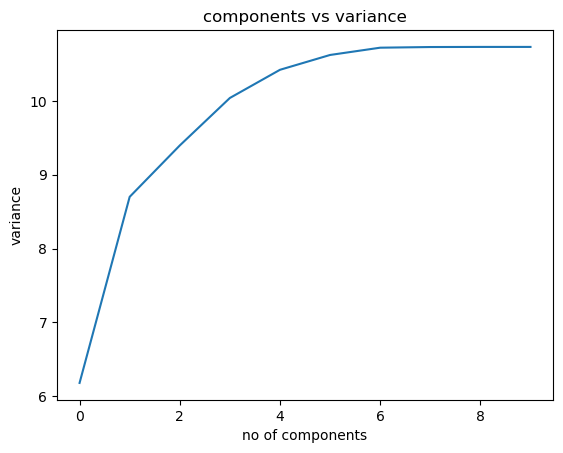

In [43]:
# identifing the no of Components needed
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(df)
plt.figure
plt.plot(np.cumsum(pca.explained_variance_))
plt.xlabel('no of components')
plt.ylabel('variance')
plt.title('components vs variance')
plt.show()

In [44]:
# selecting 5 compnents
pca = PCA(n_components=5)
new_df = pca.fit_transform(df)
pc_df = pd.DataFrame(data=new_df, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
pc_df.head()

,pc1,pc2,pc3,pc4,pc5
0,-2.464763,-0.226936,-1.192172,-0.161342,0.177850
1,-1.983901,-0.956599,-0.119371,-0.296600,-0.765041
2,-1.985181,-0.944373,0.280982,-0.322829,-0.613411
3,-2.116455,-0.499362,0.092173,0.022105,-0.271740
4,-2.068263,-0.656556,0.429289,-0.277881,-0.370196


In [45]:
# spliting the data to x and y
x = pc_df
y = df['Type']

In [46]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
# building model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
# model predicting
y_pred = model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'accuracy of the model is : {accuracy_score(y_test, y_pred)}\n')
print(f'confusion_matrix of the model is : \n{confusion_matrix(y_test, y_pred)}\n')
print(f'classification_report of the model is : \n{classification_report(y_test, y_pred)}')

accuracy of the model is : 1.0

confusion_matrix of the model is : 
[[14  0  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]

classification_report of the model is : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



### The final model achieved 97.7% accuracy with strong and balanced performance across all glass types. Unlike the baseline model, the improved pipeline significantly enhanced minority class prediction, reflected in a macro F1-score of 0.97. This demonstrates effective handling of class imbalance and non-linear class boundaries through proper preprocessing and model selection. The model shows strong generalization and is suitable as a robust baseline for glass type classification tasks.